# wine logistic regression

In [1]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

%config IPCompleter.greedy=True #autocomplete jupyter

In [2]:
# import some data to play with
wine = datasets.load_wine()
x = wine.data
y = wine.target

target_names = wine.target_names
features_names = wine.feature_names

mask_2 = y!=2
x = x[mask_2]
y = y[mask_2]

x_data_frame = pd.DataFrame(x,columns = features_names)

In [3]:
x_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 13 columns):
alcohol                         130 non-null float64
malic_acid                      130 non-null float64
ash                             130 non-null float64
alcalinity_of_ash               130 non-null float64
magnesium                       130 non-null float64
total_phenols                   130 non-null float64
flavanoids                      130 non-null float64
nonflavanoid_phenols            130 non-null float64
proanthocyanins                 130 non-null float64
color_intensity                 130 non-null float64
hue                             130 non-null float64
od280/od315_of_diluted_wines    130 non-null float64
proline                         130 non-null float64
dtypes: float64(13)
memory usage: 13.3 KB


In [4]:
target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

# train test val split

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)#random_state

# Applied Logistic Regression

In [6]:
#Create the Classifier
logreg = LogisticRegression()

#Fit the Classifier
logreg.fit(x_train, y_train)

#predict
y_pred = logreg.predict(x_test)

#Predict Proba
y_proba = logreg.predict_proba(x_test)

#score calculation
y_score = logreg.score(x,y)*100

print("prediction on test set")
print(y_pred)
print("\n")

print("probability prediction on test set")
print(y_proba)
print("\n")

print("score of test prediction")
print(y_score)

prediction on test set
[1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1]


probability prediction on test set
[[6.40612829e-07 9.99999359e-01]
 [9.06983325e-04 9.99093017e-01]
 [1.47848046e-05 9.99985215e-01]
 [1.14910830e-05 9.99988509e-01]
 [3.46131654e-03 9.96538683e-01]
 [8.36605166e-06 9.99991634e-01]
 [9.44526134e-07 9.99999055e-01]
 [1.59544031e-05 9.99984046e-01]
 [4.83856017e-04 9.99516144e-01]
 [9.83055221e-01 1.69447787e-02]
 [4.80192425e-06 9.99995198e-01]
 [9.13115687e-01 8.68843132e-02]
 [3.81774873e-02 9.61822513e-01]
 [9.99630933e-01 3.69067396e-04]
 [9.77540495e-01 2.24595048e-02]
 [9.79838089e-01 2.01619115e-02]
 [4.13939793e-04 9.99586060e-01]
 [9.99963482e-01 3.65184881e-05]
 [9.99870183e-01 1.29816922e-04]
 [9.92639584e-01 7.36041637e-03]
 [1.25382917e-04 9.99874617e-01]
 [9.99997815e-01 2.18532941e-06]
 [5.71362361e-02 9.42863764e-01]
 [3.83820306e-02 9.61617969e-01]
 [3.41950595e-01 6.58049405e-01]
 [2.21333380e-05 9.99977867e-01]]


score of test prediction


C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Logistic Regression - Parameters - max_iter parameter

C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\zigi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warni

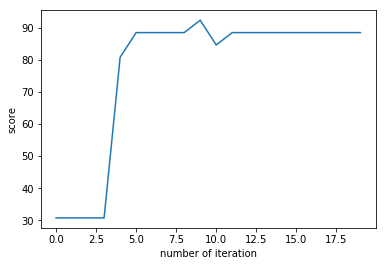

In [7]:
# Example With - max_iter parameter

score_list = list()
max_value = 20

for i in range(max_value):
    #Create the Classifier
    logreg = LogisticRegression(max_iter=i)

    #Fit the Classifier
    logreg.fit(x_train, y_train)

    #predict
    y_pred = logreg.predict(x_test)
    
    y_score = logreg.score(x_test,y_test)*100
    score_list.append(y_score)
    
plt.plot([i for i in range(max_value)],score_list)
plt.xlabel("number of iteration")
plt.ylabel("score")
plt.show()